In [1]:
## 1. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data acquisition

In [2]:
df = pd.read_csv('ecommerceDataset.csv')
df.head()


,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [3]:
df.columns = ['label', 'text']

In [4]:
df.head()

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50424 non-null  object
 1   text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [6]:
df.isnull().sum()


label    0
text     1
dtype: int64

# Data Cleaning

In [7]:
#delete null values in the df

df = df.dropna()
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
# delete duplicates

df = df.drop_duplicates()
df.duplicated().sum()

0

# EDA

In [9]:
df['label'].value_counts()

Household                 10563
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: label, dtype: int64

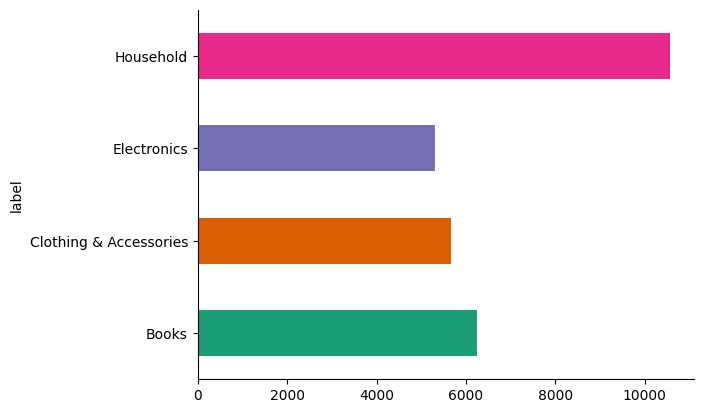

In [10]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

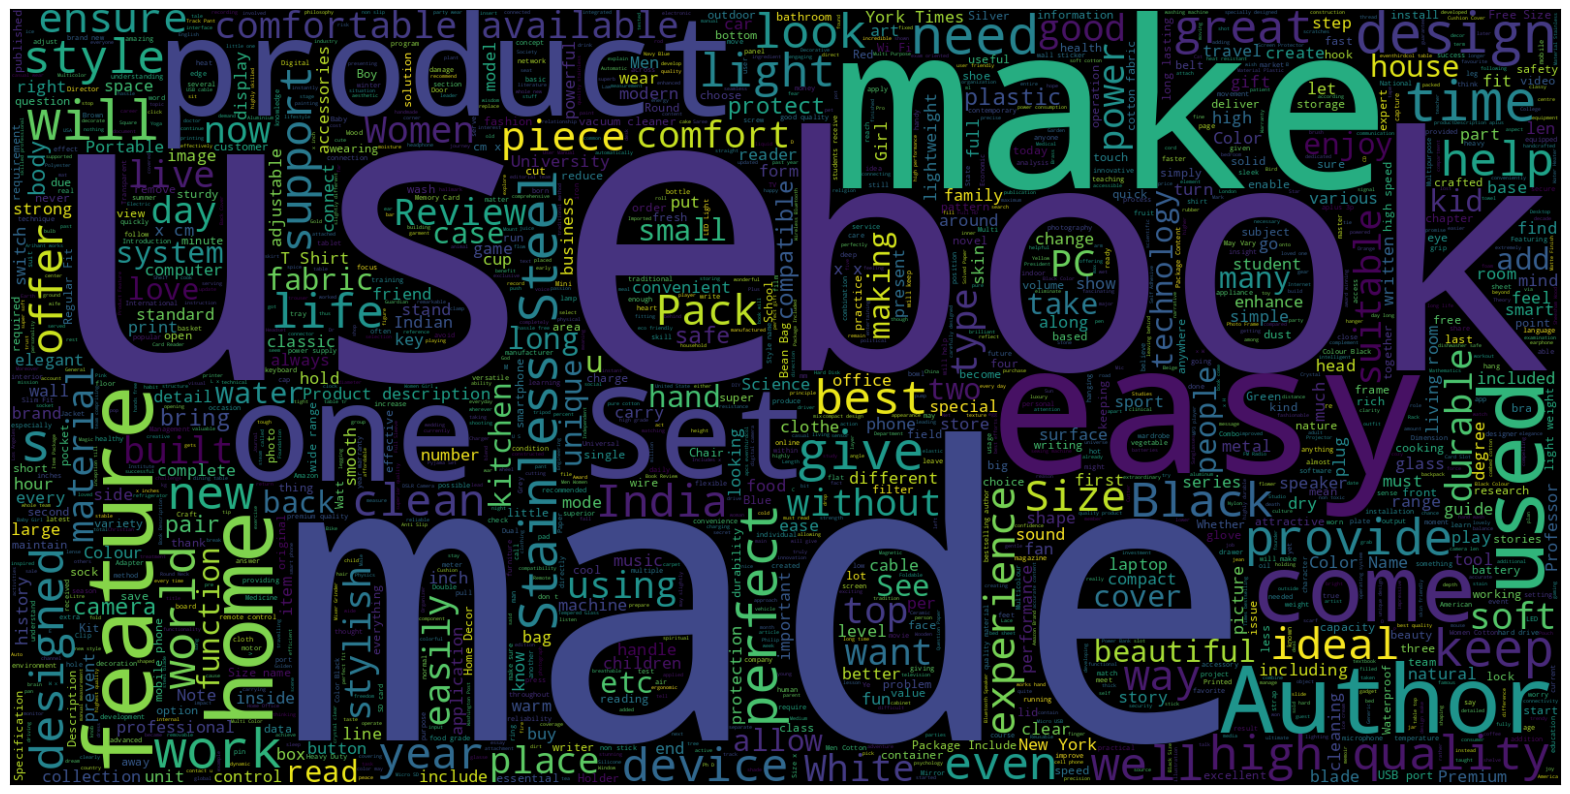

In [11]:
from wordcloud import WordCloud,STOPWORDS

def wordcloud_vis(df, col_name):

    plt.figure(figsize=(20, 20))
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df[col_name]))
    plt.imshow(wc, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.show()

wordcloud_vis(df, 'text')

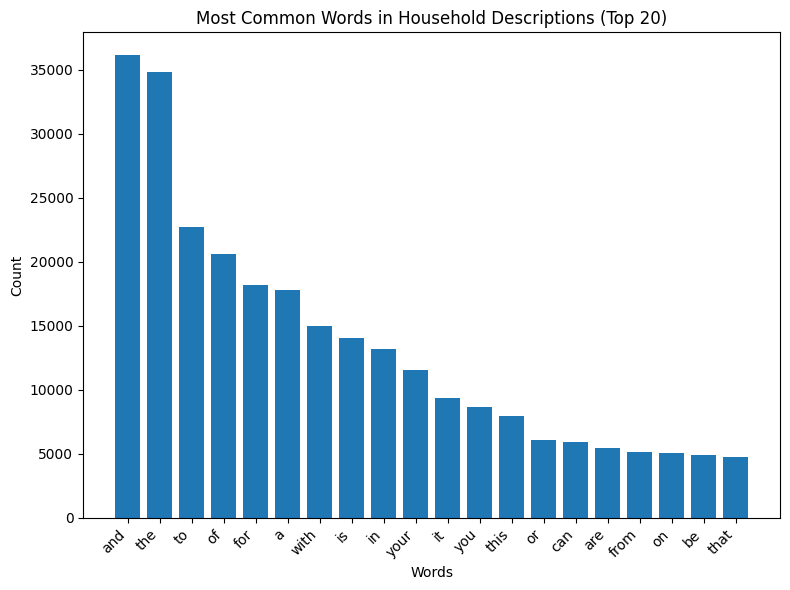

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Filter data for "Household" category
household_data = df[df['label'] == 'Household']['text']

# Combine all text data for this category
all_text = ' '.join(household_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Household Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


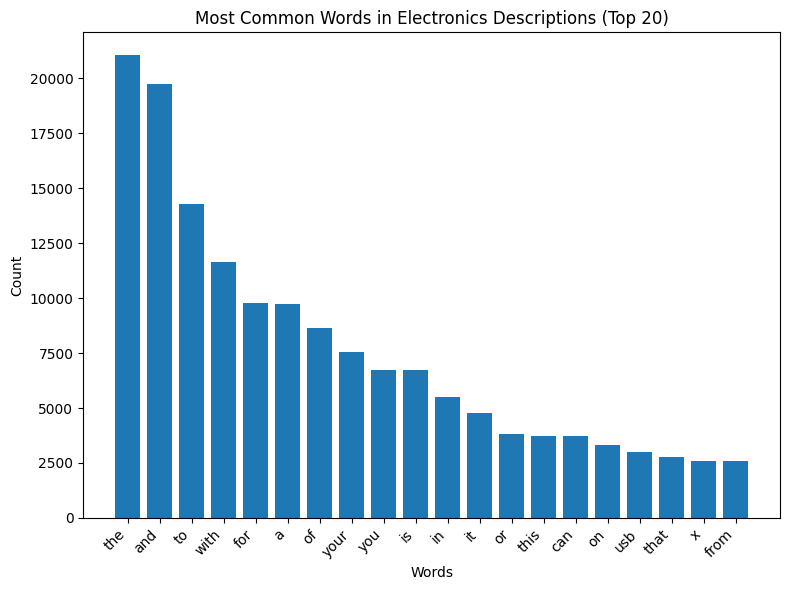

In [13]:
# Filter data for "Electronics" category
Electronics_data = df[df['label'] == 'Electronics']['text']

# Combine all text data for this category
all_text = ' '.join(Electronics_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Electronics Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

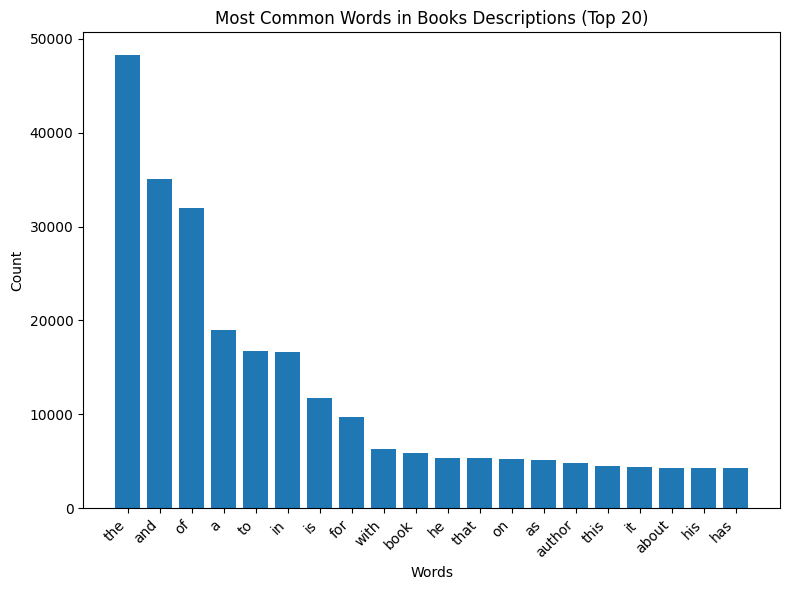

In [14]:
# Filter data for "Books" category
Books_data = df[df['label'] == 'Books']['text']

# Combine all text data for this category
all_text = ' '.join(Books_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Books Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

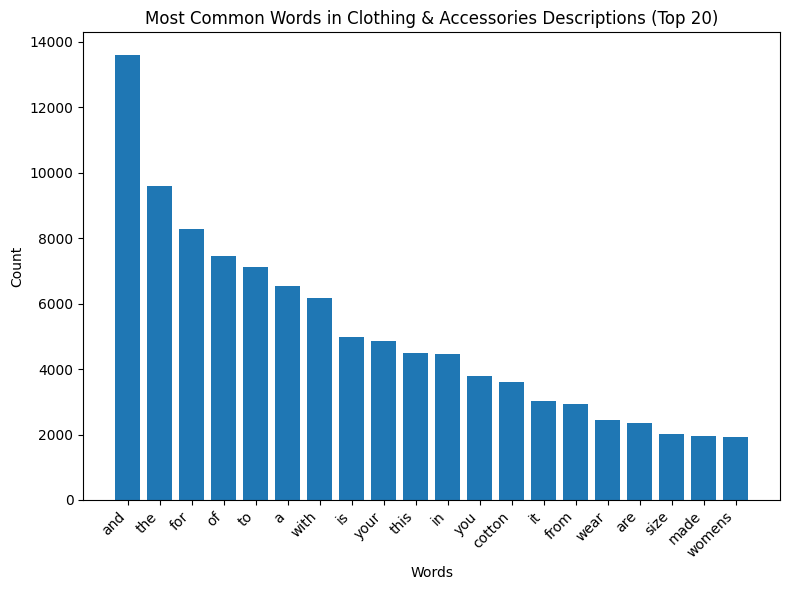

In [15]:
# Filter data for "Clothing & Accessories" category
clothes_data = df[df['label'] == 'Clothing & Accessories']['text']

# Combine all text data for this category
all_text = ' '.join(clothes_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Clothing & Accessories Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Data preprocessing

In [16]:
#using nltk, create a function to lowercase words,and lematize the text data in text column
import nltk
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

def lemmatize_text(text):
  lemmatizer = nltk.stem.WordNetLemmatizer()
  text = text.lower() # Convert to lowercase
  words = word_tokenize(text)
  lemmatized_text = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_text)

df['text'] = df['text'].apply(lemmatize_text)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text
0,Household,"saf 'floral ' framed painting ( wood , 30 inch..."
1,Household,saf 'uv textured modern art print framed ' pai...
2,Household,"saf flower print framed painting ( synthetic ,..."
3,Household,incredible gift india wooden happy birthday un...
4,Household,pitaara box romantic venice canvas painting 6m...
...,...,...
50401,Electronics,micromax bharat 5 plus zero impact on visual d...
50402,Electronics,microsoft lumia 550 8gb 4g black microsoft lum...
50406,Electronics,"microsoft lumia 535 ( black , 8gb ) colour : b..."
50407,Electronics,karbonn titanium wind w4 ( white ) karbonn tit...


In [17]:
# using nltk, create a function to remove stopwords and punctuations and clean the text data in text column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

def clean_text(text):
  stop_words = set(stopwords.words('english'))
  text = ''.join([char for char in text if char not in punctuation])
  words = word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df['text'] = df['text'].apply(clean_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text
0,Household,saf floral framed painting wood 30 inch x 10 i...
1,Household,saf uv textured modern art print framed painti...
2,Household,saf flower print framed painting synthetic 135...
3,Household,incredible gift india wooden happy birthday un...
4,Household,pitaara box romantic venice canvas painting 6m...
...,...,...
50401,Electronics,micromax bharat 5 plus zero impact visual disp...
50402,Electronics,microsoft lumia 550 8gb 4g black microsoft lum...
50406,Electronics,microsoft lumia 535 black 8gb colour black pro...
50407,Electronics,karbonn titanium wind w4 white karbonn titaniu...


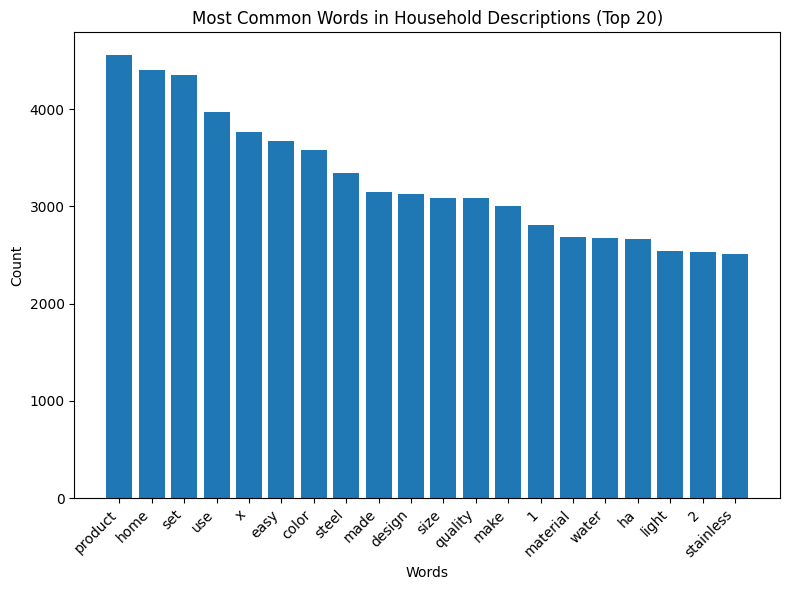

In [18]:
# Filter data for "Household" category
household_data = df[df['label'] == 'Household']['text']

# Combine all text data for this category
all_text = ' '.join(household_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Household Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


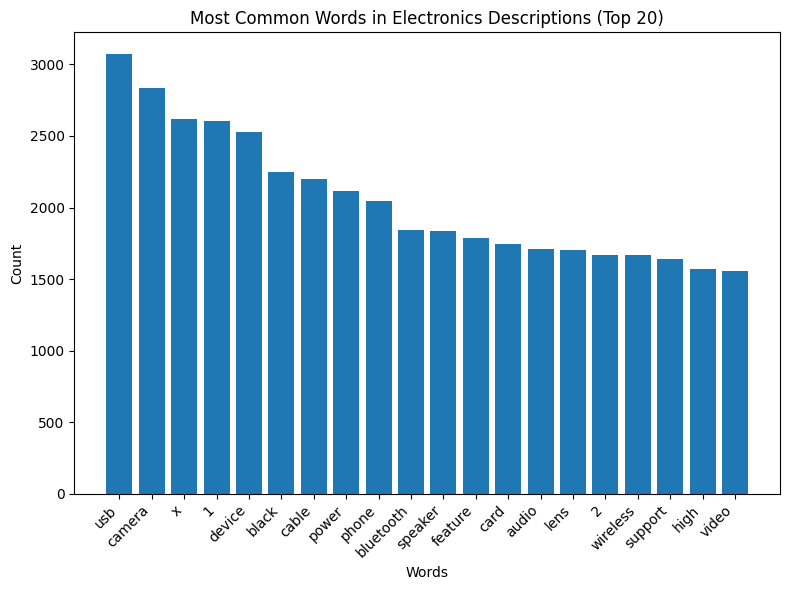

In [19]:
# Filter data for "Electronics" category
Electronics_data = df[df['label'] == 'Electronics']['text']

# Combine all text data for this category
all_text = ' '.join(Electronics_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Electronics Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

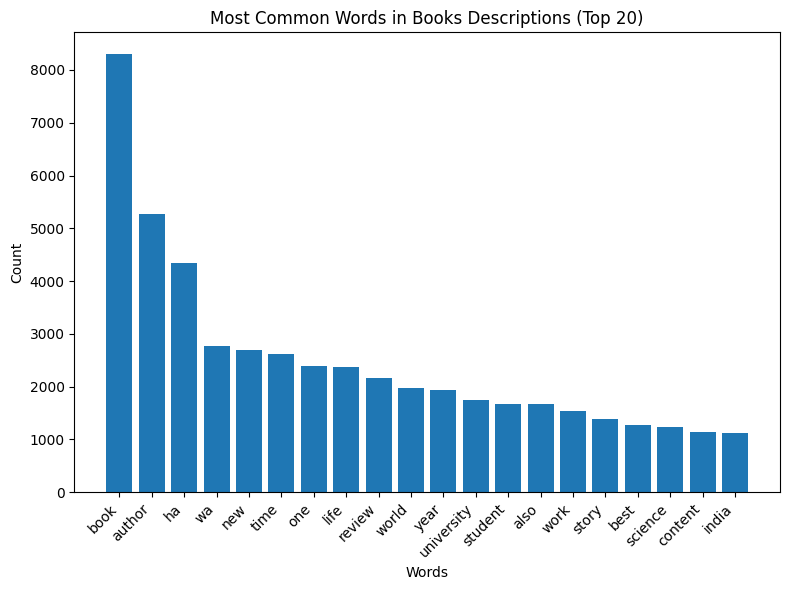

In [20]:
# Filter data for "Books" category
Books_data = df[df['label'] == 'Books']['text']

# Combine all text data for this category
all_text = ' '.join(Books_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Books Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

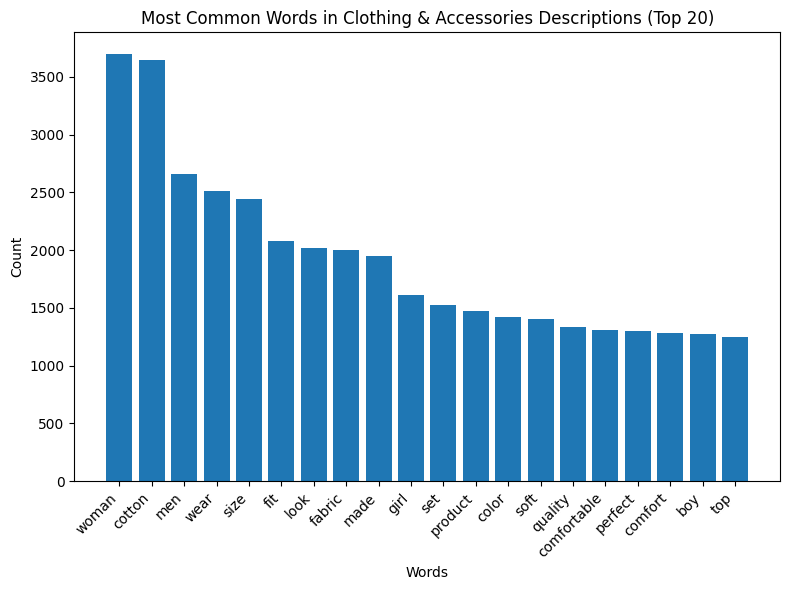

In [21]:
# Filter data for "Clothing & Accessories" category
clothes_data = df[df['label'] == 'Clothing & Accessories']['text']

# Combine all text data for this category
all_text = ' '.join(clothes_data)

# Remove punctuation and convert to lowercase
text_no_punct = ''.join([char for char in all_text if char.isalnum() or char.isspace()])
text_lowercase = text_no_punct.lower()

# Count word occurrences
word_counts = Counter(text_lowercase.split())

# Get the top 20 most common words
top_n_words = word_counts.most_common(20)

# Prepare data for visualization
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words in Clothing & Accessories Descriptions (Top {})".format(len(words)))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Feature Engineering

In [22]:
#using label encoding, label the data in label column to represent different categories

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()


,label,text
0,3,saf floral framed painting wood 30 inch x 10 i...
1,3,saf uv textured modern art print framed painti...
2,3,saf flower print framed painting synthetic 135...
3,3,incredible gift india wooden happy birthday un...
4,3,pitaara box romantic venice canvas painting 6m...


In [23]:
df['label'].value_counts()

3    10563
0     6256
1     5674
2     5308
Name: label, dtype: int64

In [24]:
target = df.label
features = df.text

# Modelling

In [25]:
#using the Vectorizer before doing the classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20)

vectorizer = TfidfVectorizer(stop_words = 'english')
transformed_train = vectorizer.fit_transform(X_train)
transformed_test = vectorizer.transform(X_test)


Ariel random forest

In [26]:
# use random forest with default paramas to train the model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(transformed_train, y_train)

y_pred = model.predict(transformed_test)


test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy * 100, "%")

train_accuracy = accuracy_score(y_train, model.predict(transformed_train))
print("Train Accuracy:", train_accuracy * 100, "%")

Test Accuracy: 92.95090811005214 %
Train Accuracy: 99.99550359712231 %


In [27]:

# get list of parameters with default values
param_list = model.get_params()

for param, value in param_list.items():
  print(f"{param}: {value}")



bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [17]:
#using grid search, find key hyperparameters of the random forest model while displaying the outputs of each combination of hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid3 = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [ 20, 30, 40, 50],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
}
# Create a GridSearchCV object
grid_search3 = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid3,cv=5, n_jobs=-1, verbose =2, scoring='accuracy')

# Fit the grid search object to the training data
grid_search3.fit(transformed_train, y_train)

# Get the best parameters and score
best_params3 = grid_search3.best_params_
best_score3 = grid_search3.best_score_

print("Best Parameters:", best_params3)
print("Best Score:", best_score3)

# Get the best estimator
best_model3 = grid_search3.best_estimator_

# Evaluate the best model on the test data
y_pred3 = best_model3.predict(transformed_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3 * 100, "%")

# Get the results of each combination of hyperparameters
cv_results3 = grid_search3.cv_results_

# Print the results
for i in range(len(cv_results3['params'])):
    print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f"Combination {i+1}:")
    print(f"Parameters: {cv_results3['params'][i]}")
    print(f"Mean Test Score: {cv_results3['mean_test_score'][i]}")
    print(f"Standard Deviation: {cv_results3['std_test_score'][i]}")
    print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}
Best Score: 0.8883992805755396
Accuracy: 89.37241503326739 %
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Combination 1:
Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Mean Test Score: 0.720908273381295
Standard Deviation: 0.01397405046814297
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
# use random forest  to train the model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth= 50, min_samples_leaf= 1, min_samples_split= 8, n_estimators= 200)
model.fit(transformed_train, y_train)

y_pred = model.predict(transformed_test)


test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy * 100, "%")

train_accuracy = accuracy_score(y_train, model.predict(transformed_train))
print("Train Accuracy:", train_accuracy * 100, "%")

Test Accuracy: 88.74303182880777 %
Train Accuracy: 92.42805755395683 %


In [29]:
# create the confusion matrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[ 943    8   11  220]
 [   1 1056    5   81]
 [  12    5  854  233]
 [  18   14   18 2082]]


In [30]:
# the classification report

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1182
           1       0.98      0.92      0.95      1143
           2       0.96      0.77      0.86      1104
           3       0.80      0.98      0.88      2132

    accuracy                           0.89      5561
   macro avg       0.93      0.87      0.89      5561
weighted avg       0.90      0.89      0.89      5561



Nathaniel model

In [31]:
# prompt: use Naive Bayes to train the model.
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(transformed_train, y_train)

MultinomialNB(alpha=0.1)

In [32]:
#Predictions
predictions = nb_classifier.predict(transformed_test)

#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report: \n", classification_report(y_test, predictions))


Accuracy: 0.943535335371336
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1182
           1       0.97      0.97      0.97      1143
           2       0.93      0.91      0.92      1104
           3       0.92      0.96      0.94      2132

    accuracy                           0.94      5561
   macro avg       0.95      0.94      0.94      5561
weighted avg       0.94      0.94      0.94      5561



In [33]:
#hyper parameter
parameter_list = nb_classifier.get_params()
for parameter, value in parameter_list.items():
  print(parameter, ":", value)

alpha : 0.1
class_prior : None
fit_prior : True
force_alpha : warn


In [34]:
#Grid
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Array of alpha values to try
    'class_prior': [None, [0.33, 0.33, 0.34], [0.25, 0.5, 0.25]], # Priors for classes
    'fit_prior': [True, False],  # Whether to learn class prior probabilities or not
    'force_alpha': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(transformed_train, y_train)

# Print the best hyperparameters found and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_nb_classifier = grid_search.best_estimator_
y_pred = best_nb_classifier.predict(transformed_test)

# Evaluate and print the final results
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
#print("\nClassification Report:\n", classification_report(y_test, predictions))

Best hyperparameters:  {'alpha': 0.01, 'class_prior': None, 'fit_prior': False, 'force_alpha': True}
Best accuracy:  0.9471223021582734
Testing Accuracy:  0.943535335371336


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 779, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 595, in _update_class_log_prior
    raise ValueError("Number of priors must match numbe

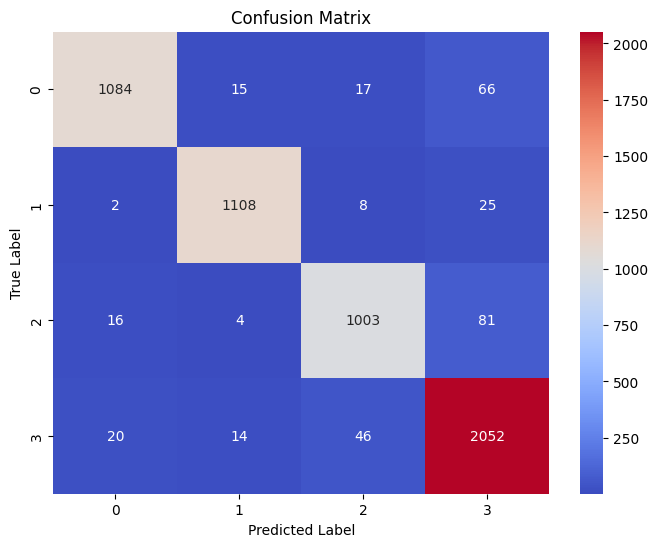

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Define the labels for your confusion matrix (these should be your class names)
labels = ['0','1','2','3']

# Create a DataFrame from the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Leonardo model

In [36]:
#RidgeClassifier algorithm
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier()
ridge_model.fit(transformed_train, y_train)

y_pred = ridge_model.predict(transformed_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100, "%")

Accuracy: 95.63028232332314 %


In [37]:
# Create the confusion matrix
ridge_cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(ridge_cm)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

[[1118    9   14   41]
 [   3 1116    7   17]
 [  14    2 1013   75]
 [  21   12   28 2071]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1182
           1       0.98      0.98      0.98      1143
           2       0.95      0.92      0.94      1104
           3       0.94      0.97      0.96      2132

    accuracy                           0.96      5561
   macro avg       0.96      0.95      0.96      5561
weighted avg       0.96      0.96      0.96      5561



In [38]:
#parameter tuning
#use alpha 0.1 for best result

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Example values for alpha

# Initialize the Ridge Classifier
ridge_model = RidgeClassifier()

# Initialize GridSearchCV with the Ridge Classifier and parameter grid
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(transformed_train, y_train)

# Get the best hyperparameters found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(transformed_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Best alpha: 1.0
Accuracy: 95.63028232332314 %
Confusion Matrix:
[[1118    9   14   41]
 [   3 1116    7   17]
 [  14    2 1013   75]
 [  21   12   28 2071]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1182
           1       0.98      0.98      0.98      1143
           2       0.95      0.92      0.94      1104
           3       0.94      0.97      0.96      2132

    accuracy                           0.96      5561
   macro avg       0.96      0.95      0.96      5561
weighted avg       0.96      0.96      0.96      5561

